In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv("diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [4]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [7]:
import seaborn as sns


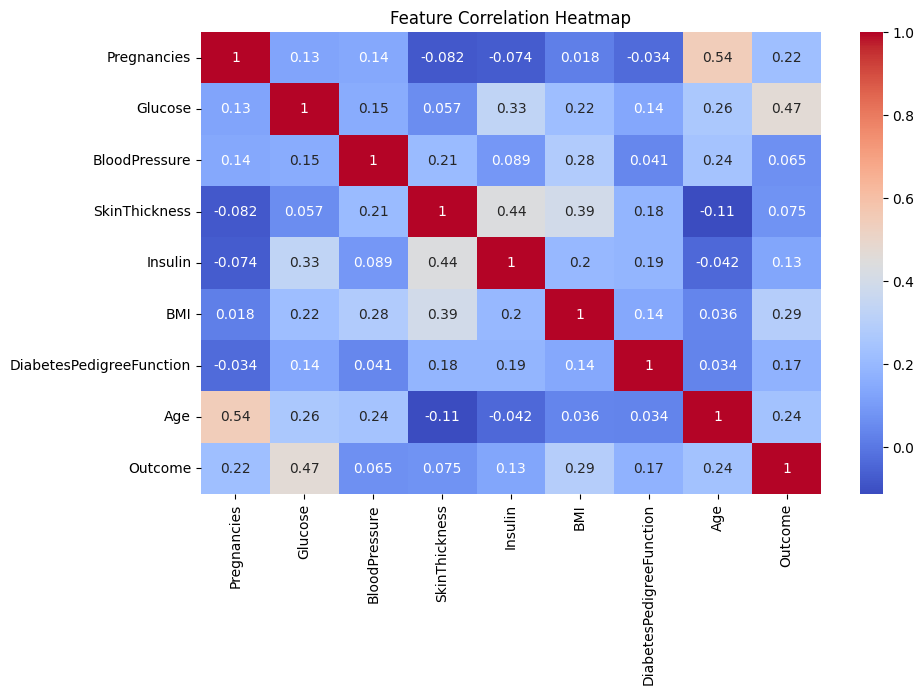

In [8]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()


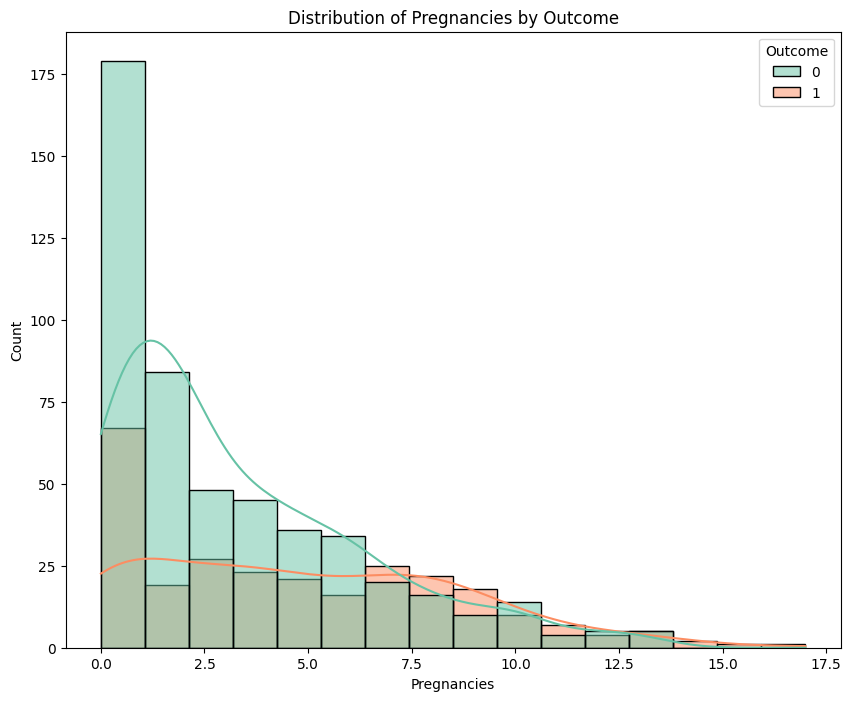

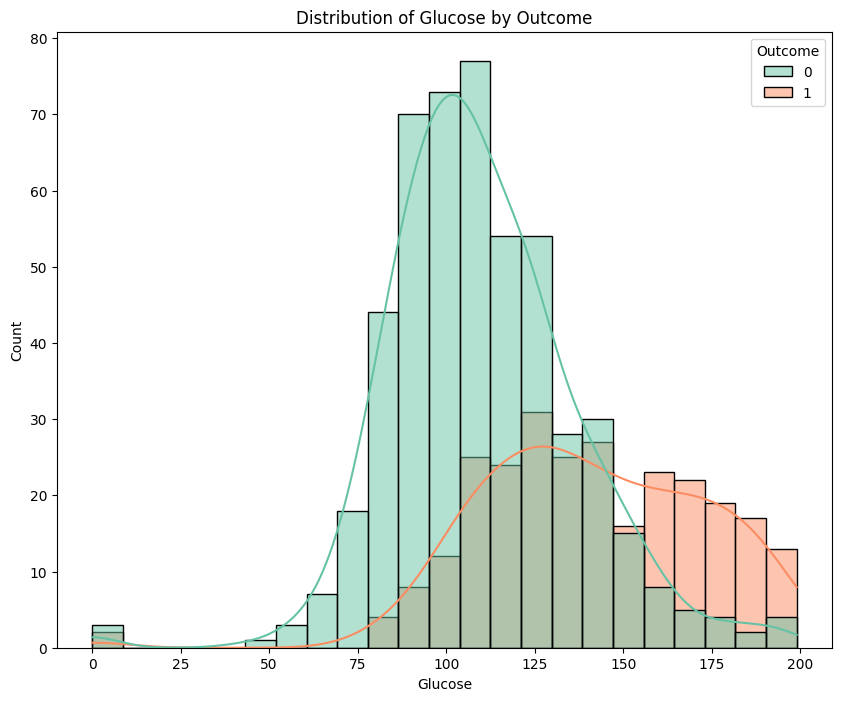

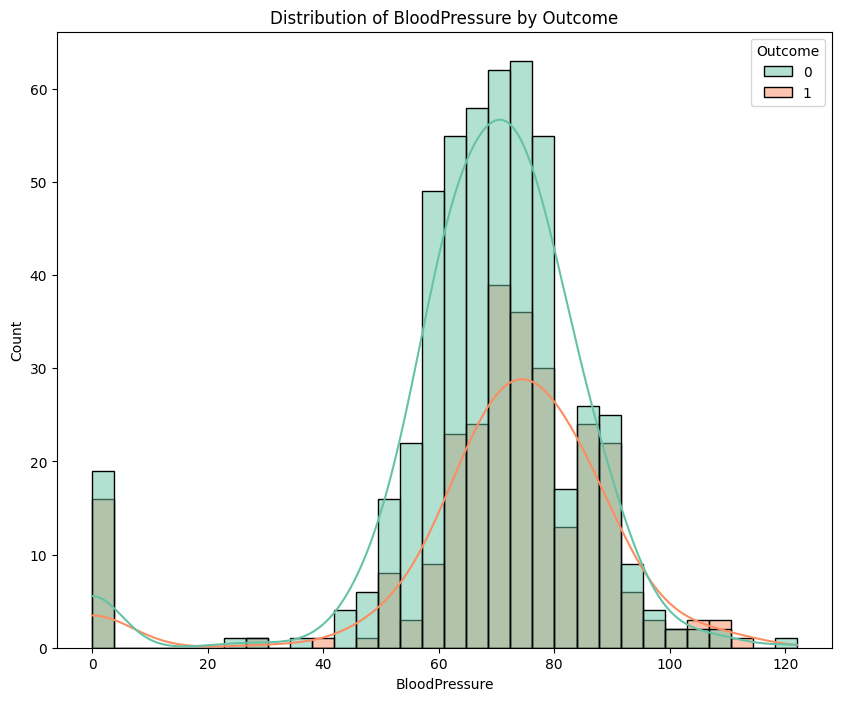

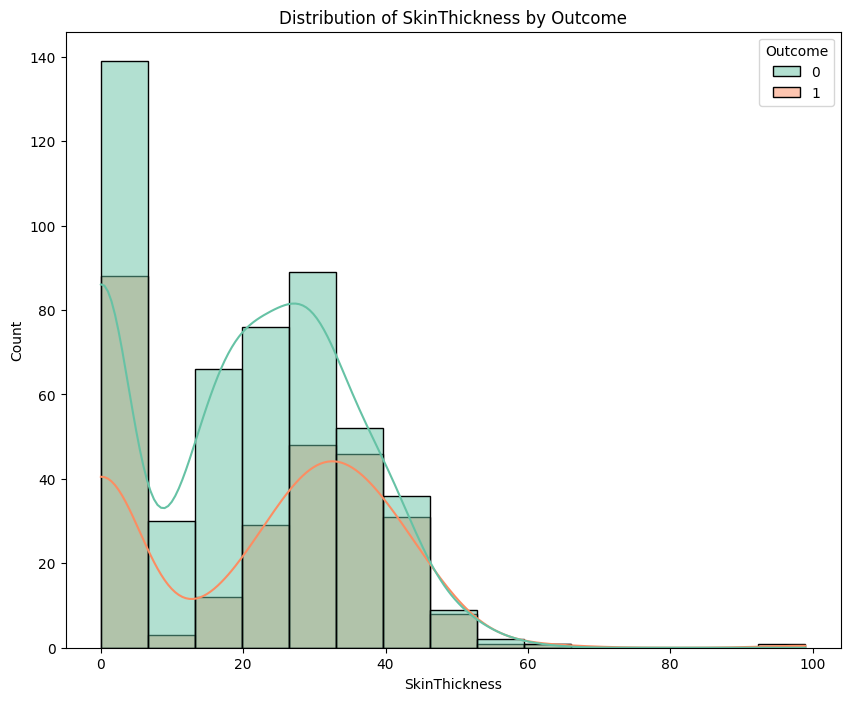

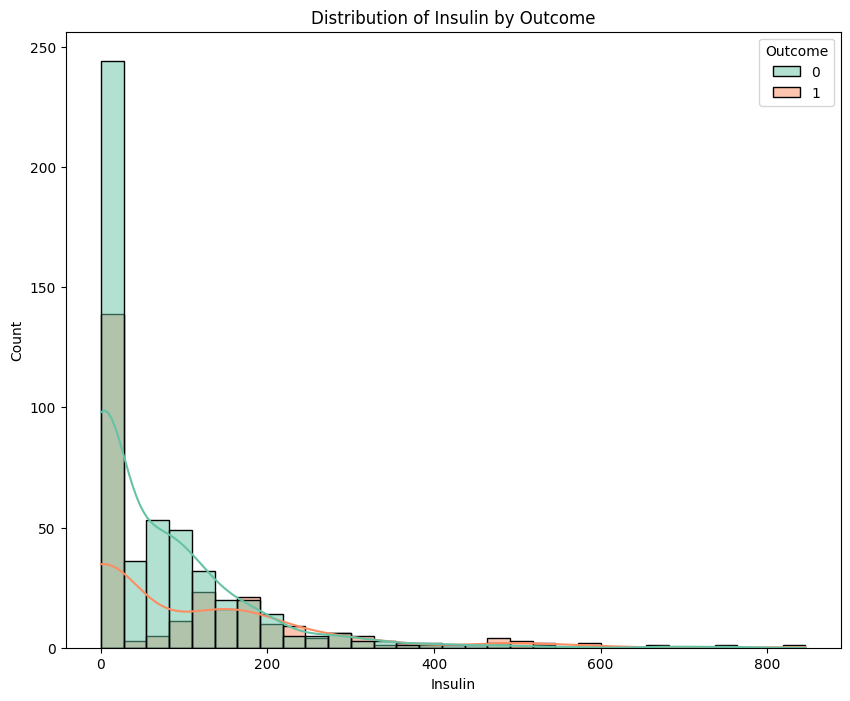

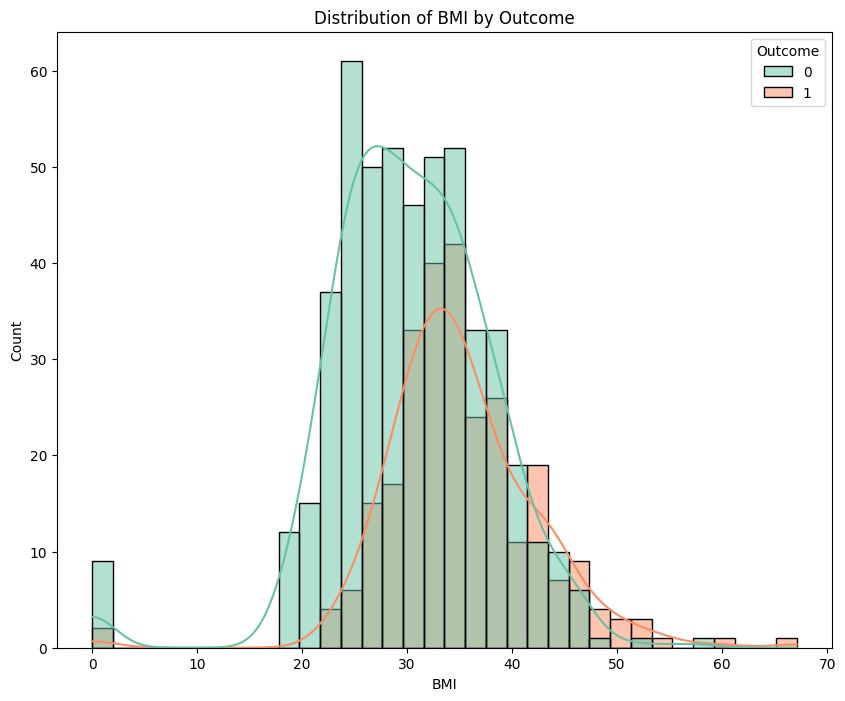

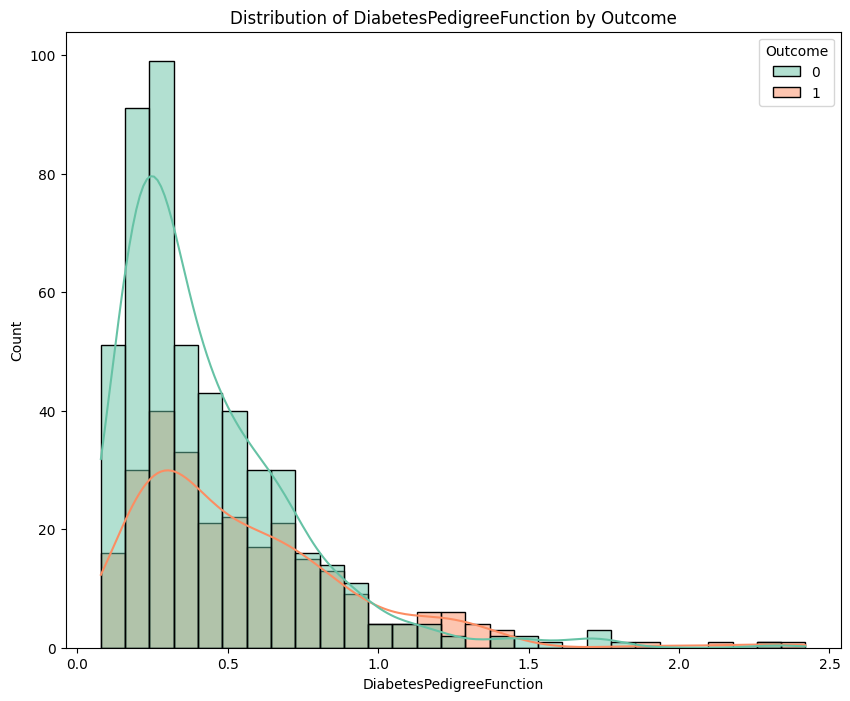

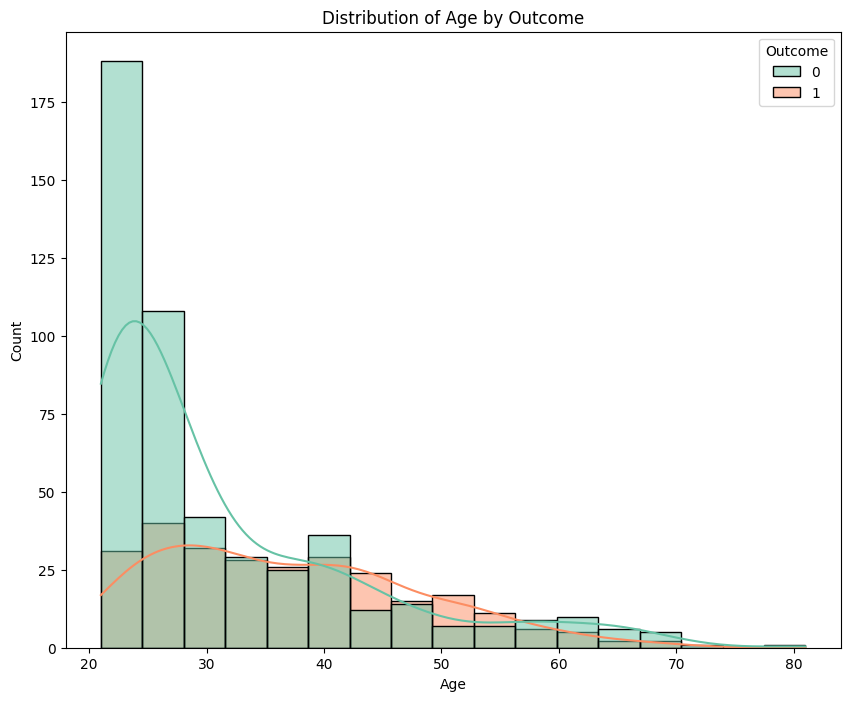

In [15]:
for column in df.columns[:-1]: 
    plt.figure(figsize=(10, 8))
    sns.histplot(data=df, x=column, hue='Outcome', kde=True, palette='Set2')
    plt.title(f'Distribution of {column} by Outcome')
    plt.show()


In [16]:
def plot_diabetes_data(X, y, feature1, feature2, pos_label="Diabetic", neg_label="Non-Diabetic"):
    """
    Plots two features from the diabetes dataset with different markers for diabetic (y=1) and non-diabetic (y=0).
    
    Parameters:
    - X: pandas DataFrame (feature data)
    - y: pandas Series or array (labels)
    - feature1: str, name of the first feature (x-axis)
    - feature2: str, name of the second feature (y-axis)
    """
    positive = y == 1
    negative = y == 0

    plt.figure(figsize=(8, 6))
    plt.plot(X.loc[positive, feature1], X.loc[positive, feature2], 'b+', label=pos_label, markersize=10)
    plt.plot(X.loc[negative, feature1], X.loc[negative, feature2], 'ro', label=neg_label, markersize=6)

    plt.xlabel(feature1)
    plt.ylabel(feature2)
    plt.legend()
    plt.title(f'{feature1} vs {feature2} by Diabetes Outcome')
    plt.grid(True)
    plt.show()

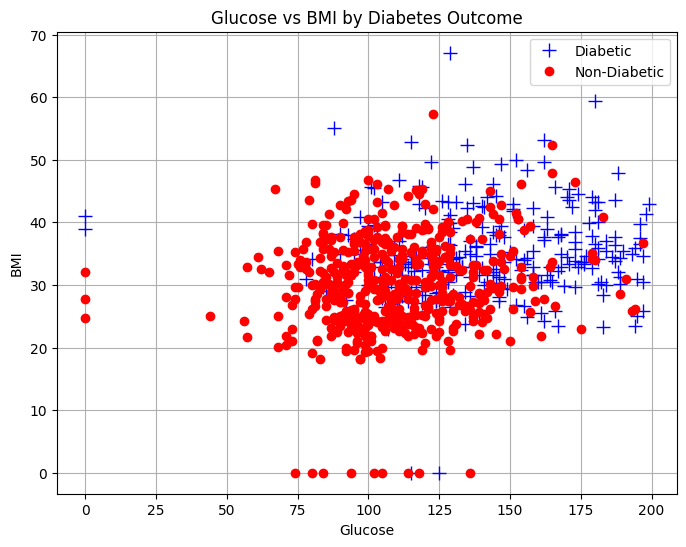

In [17]:
# Separate features and labels
X = df.drop('Outcome', axis=1)
y = df['Outcome']

plot_diabetes_data(X, y, 'Glucose', 'BMI')


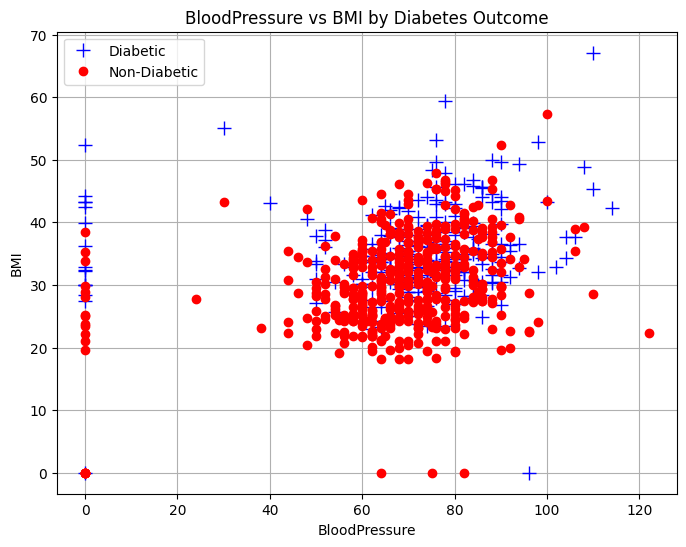

In [18]:
plot_diabetes_data(X, y, 'BloodPressure', 'BMI')

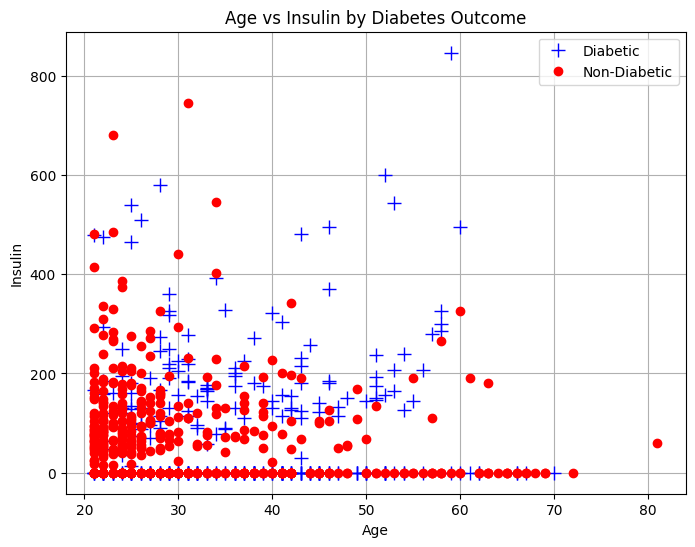

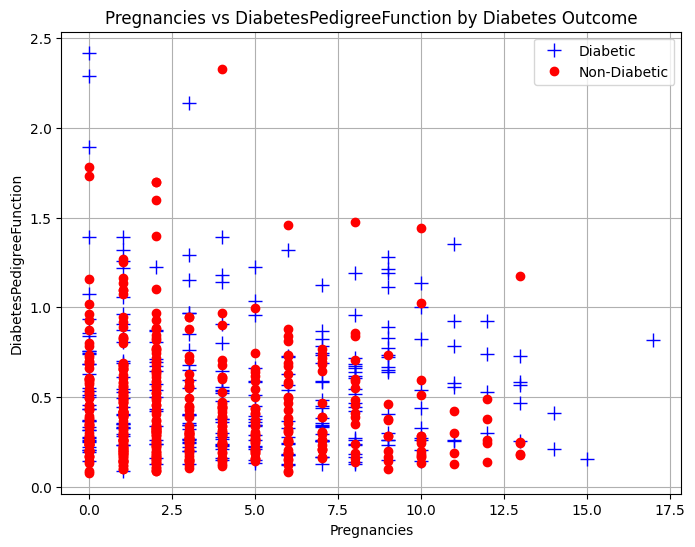

In [19]:
plot_diabetes_data(X, y, 'Age', 'Insulin')
plot_diabetes_data(X, y, 'Pregnancies', 'DiabetesPedigreeFunction')


In [20]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# Split data
X = df.drop('Outcome', axis=1)
y = df['Outcome']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train logistic regression
model = LogisticRegression()
model.fit(X_train_scaled, y_train)

# Predict and evaluate
y_pred = model.predict(X_test_scaled)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print("ROC-AUC:", roc_auc_score(y_test, model.predict_proba(X_test_scaled)[:, 1]))


[[79 20]
 [18 37]]
              precision    recall  f1-score   support

           0       0.81      0.80      0.81        99
           1       0.65      0.67      0.66        55

    accuracy                           0.75       154
   macro avg       0.73      0.74      0.73       154
weighted avg       0.76      0.75      0.75       154

ROC-AUC: 0.8146923783287419


Manual Logistic Regression Performance:
Accuracy:  0.7532
Precision: 0.6491
Recall:    0.6727
ROC-AUC:   0.7354


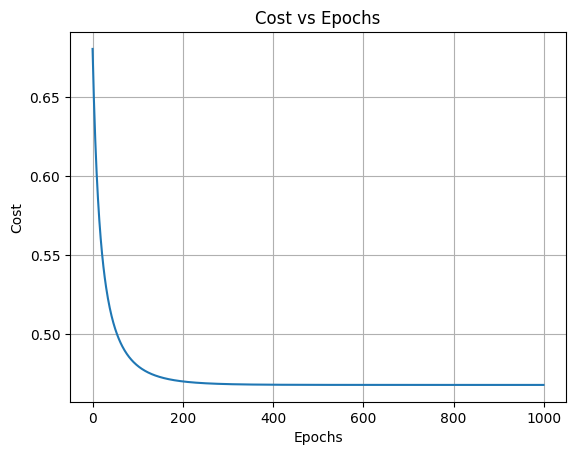

In [ ]:

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score


df = pd.read_csv("diabetes.csv")

X = df.drop("Outcome", axis=1).values
y = df["Outcome"].values.reshape(-1, 1) 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

def sigmoid(z):
    z = np.clip(z, -500, 500)  
    return 1 / (1 + np.exp(-z))


def compute_cost(X, y, weights):
    m = len(y)
    h = sigmoid(np.dot(X, weights))
    cost = (-1 / m) * (np.dot(y.T, np.log(h + 1e-9)) + np.dot((1 - y).T, np.log(1 - h + 1e-9)))
    return cost[0][0]

# 7. Gradient Descent
def gradient_descent(X, y, weights, learning_rate, epochs):
    m = len(y)
    cost_history = []

    for _ in range(epochs):
        h = sigmoid(np.dot(X, weights))
        gradient = (1 / m) * np.dot(X.T, (h - y))
        weights -= learning_rate * gradient
        cost = compute_cost(X, y, weights)
        cost_history.append(cost)
    
    return weights, cost_history


X_train_manual = np.hstack((np.ones((X_train.shape[0], 1)), X_train))
X_test_manual = np.hstack((np.ones((X_test.shape[0], 1)), X_test))


weights = np.zeros((X_train_manual.shape[1], 1))


weights, cost_history = gradient_descent(X_train_manual, y_train, weights, learning_rate=0.1, epochs=1000)


def predict(X, weights, threshold=0.5):
    probs = sigmoid(np.dot(X, weights))
    return (probs >= threshold).astype(int)

y_pred_manual = predict(X_test_manual, weights)

print("Manual Logistic Regression Performance:")
print(f"Accuracy:  {accuracy_score(y_test, y_pred_manual):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_manual):.4f}")
print(f"Recall:    {recall_score(y_test, y_pred_manual):.4f}")
print(f"ROC-AUC:   {roc_auc_score(y_test, y_pred_manual):.4f}")


plt.plot(cost_history)
plt.xlabel("Epochs")
plt.ylabel("Cost")
plt.title("Cost vs Epochs")
plt.grid()
plt.show()
